Task 2c* (1.5p). Provide the Bayesian optimization for the selected hyperparameter of one of the algorithms.

In [91]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score
from bayes_opt import BayesianOptimization

## Loading data

In [92]:
edges = "data/dolphins.edges"
clusters = "data/dolphins.clusters"
# edges = "data/karate.edges"
# clusters = "data/karate.clusters"

In [93]:
data = pd.read_csv(edges, sep='\t', names=['source', 'target'])
G = nx.from_pandas_edgelist(data, 'source', 'target')

In [94]:
data

,source,target
0,0,10
1,0,14
2,0,15
3,0,40
4,0,42
...,...,...
154,48,57
155,50,51
156,51,55
157,53,61


In [95]:
def visualize_communities(G, communities):
    color_map = []
    for node in G:
        for i, community in enumerate(communities):
            if node in community:
                color_map.append(i)
                break

    # Draw the graph
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.axis("off")
    plot_options = {"node_size": 200, "with_labels": True, "width": 0.15}
    nx.draw_networkx(G, cmap = plt.cm.Paired, node_color=color_map, **plot_options)

## nx Louvain Community Detection

In [96]:
lcd = nx.community.louvain_communities(G, seed=123)

print("Number of communities:", len(lcd))
print("Modularity:", nx.community.modularity(G, lcd))


Number of communities: 5
Modularity: 0.5188283691309679


# nx OPtimized Louvain Community Detection

In [98]:
def evaluate_louvain_communities(resolution):
    lcd = nx.community.louvain_communities(G, resolution=resolution, seed=123)

    return nx.community.modularity(G, lcd)

In [99]:
pbounds = {'resolution': (0.1, 2.0)}

optimizer = BayesianOptimization(
    f=evaluate_louvain_communities,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(
    init_points=10,
    n_iter=40,
)

print(optimizer.max)

|   iter    |  target   | resolu... |
-------------------------------------
| 1         | 0.5177    | 0.8923    |
| 2         | 0.5156    | 1.469     |
| 3         | 0.0       | 0.1002    |
| 4         | 0.5079    | 0.6744    |
| 5         | 0.3848    | 0.3788    |
| 6         | 0.3848    | 0.2754    |
| 7         | 0.3848    | 0.4539    |
| 8         | 0.5079    | 0.7566    |
| 9         | 0.5177    | 0.8539    |
| 10        | 0.5241    | 1.124     |
| 11        | 0.4889    | 1.799     |
| 12        | 0.4796    | 2.0       |
| 13        | 0.5156    | 1.297     |
| 14        | 0.5241    | 1.13      |
| 15        | 0.509     | 0.7566    |
| 16        | 0.5079    | 0.7636    |
| 17        | 0.5177    | 0.8627    |
| 18        | 0.5177    | 0.8832    |
| 19        | 0.5072    | 1.629     |
| 20        | 0.5156    | 1.385     |
| 21        | 0.5188    | 1.013     |
| 22        | 0.4796    | 1.901     |
| 23        | 0.5048    | 1.55      |
| 24        | 0.5177    | 0.8733    |
| 25        

Number of communities before: 5
Number of communities: 5
Modularity before: 0.5188283691309679
Modularity: 0.5241090146750524


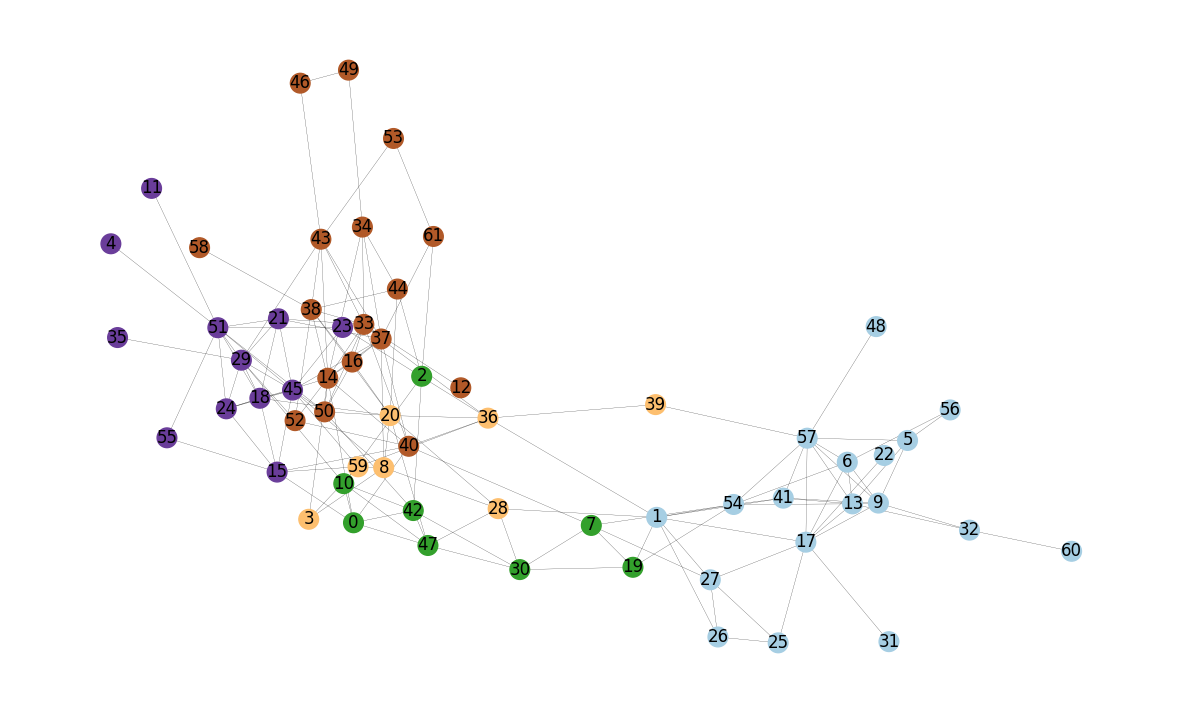

In [100]:
params = optimizer.max['params']

lcd2 = nx.community.louvain_communities(G, seed=123, **params)

print("Number of communities before:", len(lcd))
print("Number of communities:", len(lcd2))

print("Modularity before:", nx.community.modularity(G, lcd))
print("Modularity:", nx.community.modularity(G, lcd2))


visualize_communities(G, lcd2)

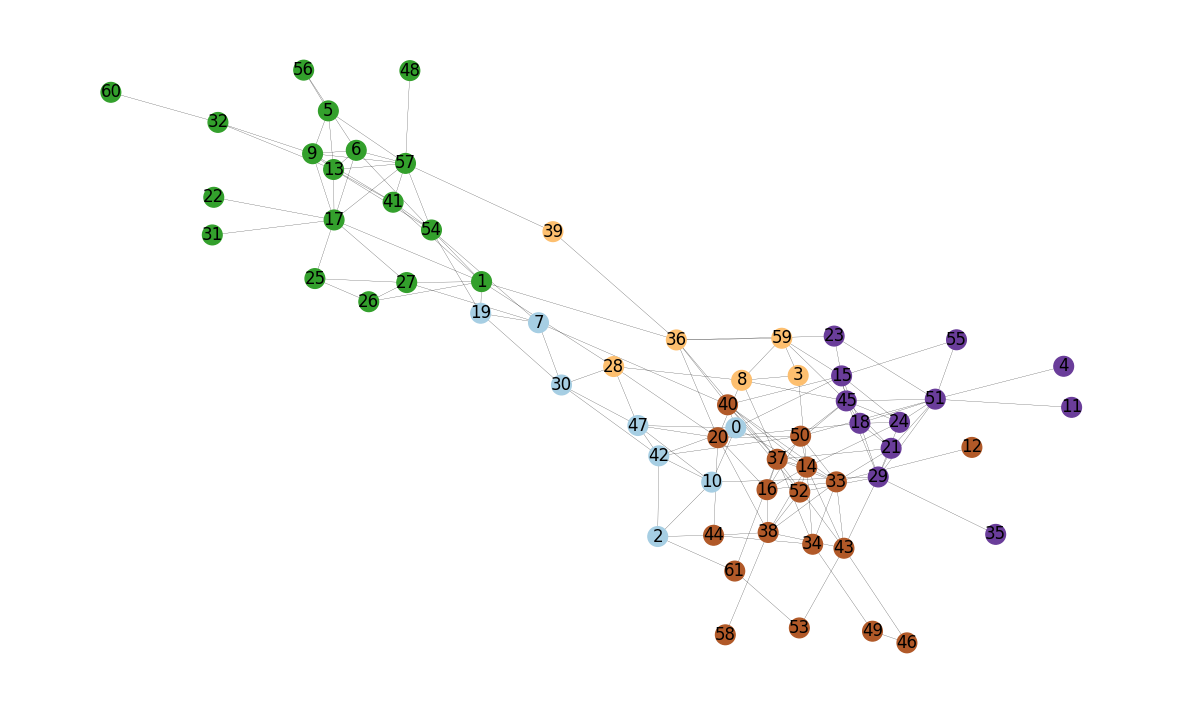

In [101]:
visualize_communities(G, lcd)